In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

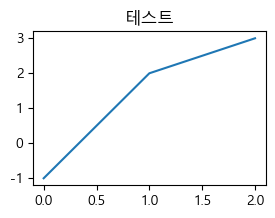

In [2]:
# ----------------------
# 그래프 전역 설정
# ----------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(12,5))

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

## 데이터 준비

*  행정안전부
    * https://www.mois.go.kr/<br>
    * 정책자료 > 주민등록인구통계>연령별 인구 현황
        * 성별구분하지않음
        * 1세단위
        * 0~100세이상
        * 전체읍면동 현황

In [3]:
# ------------------------
# 데이터프레임 생성
#   - df_all
#   - 천단위 구분자 처리 : thousands
# ------------------------
data_file = 'data/202503_202503_연령별인구현황_월간.csv'
df_all = pd.read_csv(data_file, encoding='cp949', thousands=',')

In [4]:
df_all.head(5)

,행정구역,2025년03월_계_총인구수,2025년03월_계_연령구간인구수,2025년03월_계_0세,2025년03월_계_1세,2025년03월_계_2세,2025년03월_계_3세,2025년03월_계_4세,2025년03월_계_5세,2025년03월_계_6세,...,2025년03월_계_91세,2025년03월_계_92세,2025년03월_계_93세,2025년03월_계_94세,2025년03월_계_95세,2025년03월_계_96세,2025년03월_계_97세,2025년03월_계_98세,2025년03월_계_99세,2025년03월_계_100세 이상
0,서울특별시 (1100000000),9335734,9335734,40432,37092,39575,41936,42838,45904,49637,...,10166,7861,5973,4303,3532,2592,1807,1185,635,1506
1,서울특별시 종로구 (1111000000),138184,138184,425,395,440,467,476,524,521,...,230,180,131,98,59,73,34,37,14,43
2,서울특별시 종로구 청운효자동(1111051500),10986,10986,40,44,43,41,51,45,47,...,22,15,11,10,3,7,1,3,1,4
3,서울특별시 종로구 사직동(1111053000),8937,8937,30,21,34,37,28,39,40,...,19,13,12,7,8,11,3,2,1,7
4,서울특별시 종로구 삼청동(1111054000),2189,2189,7,7,5,7,6,6,5,...,7,6,4,4,3,0,1,1,0,0


In [5]:
# ------------------------
# 컬럼명 변경
#   [ 행정구역, 총인구수, 연령구간인구수, 0세, 1세, ... , 100세이상]
#   split('_')
# ------------------------
df_all.columns = df_all.columns.str.split('_').str[-1]
df_all

,행정구역,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
0,서울특별시 (1100000000),9335734,9335734,40432,37092,39575,41936,42838,45904,49637,...,10166,7861,5973,4303,3532,2592,1807,1185,635,1506
1,서울특별시 종로구 (1111000000),138184,138184,425,395,440,467,476,524,521,...,230,180,131,98,59,73,34,37,14,43
2,서울특별시 종로구 청운효자동(1111051500),10986,10986,40,44,43,41,51,45,47,...,22,15,11,10,3,7,1,3,1,4
3,서울특별시 종로구 사직동(1111053000),8937,8937,30,21,34,37,28,39,40,...,19,13,12,7,8,11,3,2,1,7
4,서울특별시 종로구 삼청동(1111054000),2189,2189,7,7,5,7,6,6,5,...,7,6,4,4,3,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,제주특별자치도 서귀포시 서홍동(5013058000),11088,11088,61,68,76,98,84,107,109,...,15,9,10,2,5,5,3,0,1,1
3906,제주특별자치도 서귀포시 대륜동(5013059000),15038,15038,80,88,103,129,105,141,127,...,21,23,8,11,5,5,4,1,1,6
3907,제주특별자치도 서귀포시 대천동(5013060000),13672,13672,87,93,106,105,124,120,135,...,21,16,9,8,7,2,3,2,1,1
3908,제주특별자치도 서귀포시 중문동(5013061000),12122,12122,61,57,64,82,74,87,100,...,18,16,10,17,5,7,3,3,2,2


In [6]:
# ------------------------
# 파생컬럼 추가
#   행정구역명 컬럼 추가
# ------------------------
df_all['행정구역명'] = df_all['행정구역'].str.split(' ').str[0]
df_all1 = df_all.copy()
df_all

,행정구역,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,...,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명
0,서울특별시 (1100000000),9335734,9335734,40432,37092,39575,41936,42838,45904,49637,...,7861,5973,4303,3532,2592,1807,1185,635,1506,서울특별시
1,서울특별시 종로구 (1111000000),138184,138184,425,395,440,467,476,524,521,...,180,131,98,59,73,34,37,14,43,서울특별시
2,서울특별시 종로구 청운효자동(1111051500),10986,10986,40,44,43,41,51,45,47,...,15,11,10,3,7,1,3,1,4,서울특별시
3,서울특별시 종로구 사직동(1111053000),8937,8937,30,21,34,37,28,39,40,...,13,12,7,8,11,3,2,1,7,서울특별시
4,서울특별시 종로구 삼청동(1111054000),2189,2189,7,7,5,7,6,6,5,...,6,4,4,3,0,1,1,0,0,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,제주특별자치도 서귀포시 서홍동(5013058000),11088,11088,61,68,76,98,84,107,109,...,9,10,2,5,5,3,0,1,1,제주특별자치도
3906,제주특별자치도 서귀포시 대륜동(5013059000),15038,15038,80,88,103,129,105,141,127,...,23,8,11,5,5,4,1,1,6,제주특별자치도
3907,제주특별자치도 서귀포시 대천동(5013060000),13672,13672,87,93,106,105,124,120,135,...,16,9,8,7,2,3,2,1,1,제주특별자치도
3908,제주특별자치도 서귀포시 중문동(5013061000),12122,12122,61,57,64,82,74,87,100,...,16,10,17,5,7,3,3,2,2,제주특별자치도


In [7]:
# ------------------------
# 컬럼 삭제
#   - ['총인구수', '연령구간인구수']
# ------------------------
df_all.drop(['총인구수','연령구간인구수'], axis=1, inplace = True)
df_all

,행정구역,0세,1세,2세,3세,4세,5세,6세,7세,8세,...,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명
0,서울특별시 (1100000000),40432,37092,39575,41936,42838,45904,49637,53388,60097,...,7861,5973,4303,3532,2592,1807,1185,635,1506,서울특별시
1,서울특별시 종로구 (1111000000),425,395,440,467,476,524,521,599,703,...,180,131,98,59,73,34,37,14,43,서울특별시
2,서울특별시 종로구 청운효자동(1111051500),40,44,43,41,51,45,47,58,74,...,15,11,10,3,7,1,3,1,4,서울특별시
3,서울특별시 종로구 사직동(1111053000),30,21,34,37,28,39,40,50,52,...,13,12,7,8,11,3,2,1,7,서울특별시
4,서울특별시 종로구 삼청동(1111054000),7,7,5,7,6,6,5,17,6,...,6,4,4,3,0,1,1,0,0,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,제주특별자치도 서귀포시 서홍동(5013058000),61,68,76,98,84,107,109,127,143,...,9,10,2,5,5,3,0,1,1,제주특별자치도
3906,제주특별자치도 서귀포시 대륜동(5013059000),80,88,103,129,105,141,127,136,164,...,23,8,11,5,5,4,1,1,6,제주특별자치도
3907,제주특별자치도 서귀포시 대천동(5013060000),87,93,106,105,124,120,135,153,195,...,16,9,8,7,2,3,2,1,1,제주특별자치도
3908,제주특별자치도 서귀포시 중문동(5013061000),61,57,64,82,74,87,100,74,101,...,16,10,17,5,7,3,3,2,2,제주특별자치도


## 행정구역 - 연령별 인구구조

#### 데이터 준비

In [8]:
# ------------------------
# 행정구역 단위 연령별 데이터 선택
#   - df_region1
#   - 행정구역 코드가 00000000로 끝나는 데이터 선택
# ------------------------
cond = df_all['행정구역'].str[-9:-1] == '00000000'
df_region1 = df_all.loc[cond].copy()
new_df_region= df_region1.copy()
df_region1

,행정구역,0세,1세,2세,3세,4세,5세,6세,7세,8세,...,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명
0,서울특별시 (1100000000),40432,37092,39575,41936,42838,45904,49637,53388,60097,...,7861,5973,4303,3532,2592,1807,1185,635,1506,서울특별시
452,부산광역시 (2600000000),13043,12714,14069,15110,15459,17155,19023,21255,23736,...,2901,2343,1464,1251,943,698,377,256,440,부산광역시
675,대구광역시 (2700000000),10329,9832,10766,11684,12135,13884,15205,16810,19102,...,2333,1776,1189,858,625,423,263,153,275,대구광역시
837,인천광역시 (2800000000),15919,14938,16358,16910,17677,19008,20664,21466,24249,...,2645,1936,1490,1138,890,587,398,239,522,인천광역시
1011,광주광역시 (2900000000),6042,6253,7175,7867,8171,9052,9859,10775,12190,...,1189,898,665,596,374,239,170,101,182,광주광역시
1113,대전광역시 (3000000000),7221,7148,7847,7784,7874,8456,9347,10185,11497,...,1230,953,691,560,392,269,162,98,215,대전광역시
1201,울산광역시 (3100000000),5238,4909,5335,5939,6286,7007,7608,8529,9835,...,669,481,323,259,177,124,105,56,86,울산광역시
1262,세종특별자치시 (3600000000),2819,2751,3196,3603,3752,4062,4523,4960,5318,...,258,187,155,103,103,60,41,20,38,세종특별자치시
1288,경기도 (4100000000),72652,70577,77338,81051,83700,90151,97585,105290,117515,...,11278,8262,6282,4867,3603,2538,1576,978,1984,경기도
1949,강원특별자치도 (5100000000),6464,6638,7291,7428,7790,8493,8688,9534,10441,...,2057,1607,1238,980,760,497,345,203,440,강원특별자치도


In [9]:
# ------------------------
# 행정구역명 컬럼을 인덱스로 지정
# ------------------------
df_region1.set_index('행정구역명',inplace = True)
df_region1

,행정구역,0세,1세,2세,3세,4세,5세,6세,7세,8세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역명,,,,,,,,,,,,,,,,,,,,,
서울특별시,서울특별시 (1100000000),40432,37092,39575,41936,42838,45904,49637,53388,60097,...,10166,7861,5973,4303,3532,2592,1807,1185,635,1506
부산광역시,부산광역시 (2600000000),13043,12714,14069,15110,15459,17155,19023,21255,23736,...,3956,2901,2343,1464,1251,943,698,377,256,440
대구광역시,대구광역시 (2700000000),10329,9832,10766,11684,12135,13884,15205,16810,19102,...,2913,2333,1776,1189,858,625,423,263,153,275
인천광역시,인천광역시 (2800000000),15919,14938,16358,16910,17677,19008,20664,21466,24249,...,3239,2645,1936,1490,1138,890,587,398,239,522
광주광역시,광주광역시 (2900000000),6042,6253,7175,7867,8171,9052,9859,10775,12190,...,1544,1189,898,665,596,374,239,170,101,182
대전광역시,대전광역시 (3000000000),7221,7148,7847,7784,7874,8456,9347,10185,11497,...,1646,1230,953,691,560,392,269,162,98,215
울산광역시,울산광역시 (3100000000),5238,4909,5335,5939,6286,7007,7608,8529,9835,...,873,669,481,323,259,177,124,105,56,86
세종특별자치시,세종특별자치시 (3600000000),2819,2751,3196,3603,3752,4062,4523,4960,5318,...,329,258,187,155,103,103,60,41,20,38
경기도,경기도 (4100000000),72652,70577,77338,81051,83700,90151,97585,105290,117515,...,14412,11278,8262,6282,4867,3603,2538,1576,978,1984


In [10]:
# ------------------------
# 행정구역 컬럼을 삭제
# ------------------------
df_region1.drop(['행정구역'], axis=1, inplace = True)
df_region1

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역명,,,,,,,,,,,,,,,,,,,,,
서울특별시,40432,37092,39575,41936,42838,45904,49637,53388,60097,66052,...,10166,7861,5973,4303,3532,2592,1807,1185,635,1506
부산광역시,13043,12714,14069,15110,15459,17155,19023,21255,23736,26661,...,3956,2901,2343,1464,1251,943,698,377,256,440
대구광역시,10329,9832,10766,11684,12135,13884,15205,16810,19102,20500,...,2913,2333,1776,1189,858,625,423,263,153,275
인천광역시,15919,14938,16358,16910,17677,19008,20664,21466,24249,26538,...,3239,2645,1936,1490,1138,890,587,398,239,522
광주광역시,6042,6253,7175,7867,8171,9052,9859,10775,12190,13329,...,1544,1189,898,665,596,374,239,170,101,182
대전광역시,7221,7148,7847,7784,7874,8456,9347,10185,11497,12557,...,1646,1230,953,691,560,392,269,162,98,215
울산광역시,5238,4909,5335,5939,6286,7007,7608,8529,9835,10698,...,873,669,481,323,259,177,124,105,56,86
세종특별자치시,2819,2751,3196,3603,3752,4062,4523,4960,5318,5864,...,329,258,187,155,103,103,60,41,20,38
경기도,72652,70577,77338,81051,83700,90151,97585,105290,117515,129118,...,14412,11278,8262,6282,4867,3603,2538,1576,978,1984


In [11]:
# ------------------------
# 행열 전치
# ------------------------
df_region1_T = df_region1.T
df_region1_T

행정구역명,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도
0세,40432,13043,10329,15919,6042,7221,5238,2819,72652,6464,7591,9909,6731,8156,10103,12959,3139
1세,37092,12714,9832,14938,6253,7148,4909,2751,70577,6638,7549,9603,6666,7657,9833,13180,3183
2세,39575,14069,10766,16358,7175,7847,5335,3196,77338,7291,7709,10427,7130,7992,10779,14108,3572
3세,41936,15110,11684,16910,7867,7784,5939,3603,81051,7428,8379,11263,7654,8444,11413,15136,3878
4세,42838,15459,12135,17677,8171,7874,6286,3752,83700,7790,8601,12113,8273,8955,12009,16515,4127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96세,2592,943,625,890,374,392,177,103,3603,760,604,984,875,951,1135,1043,247
97세,1807,698,423,587,239,269,124,60,2538,497,370,621,658,594,824,723,182
98세,1185,377,263,398,170,162,105,41,1576,345,255,396,389,459,501,463,110
99세,635,256,153,239,101,98,56,20,978,203,156,237,195,265,294,275,75


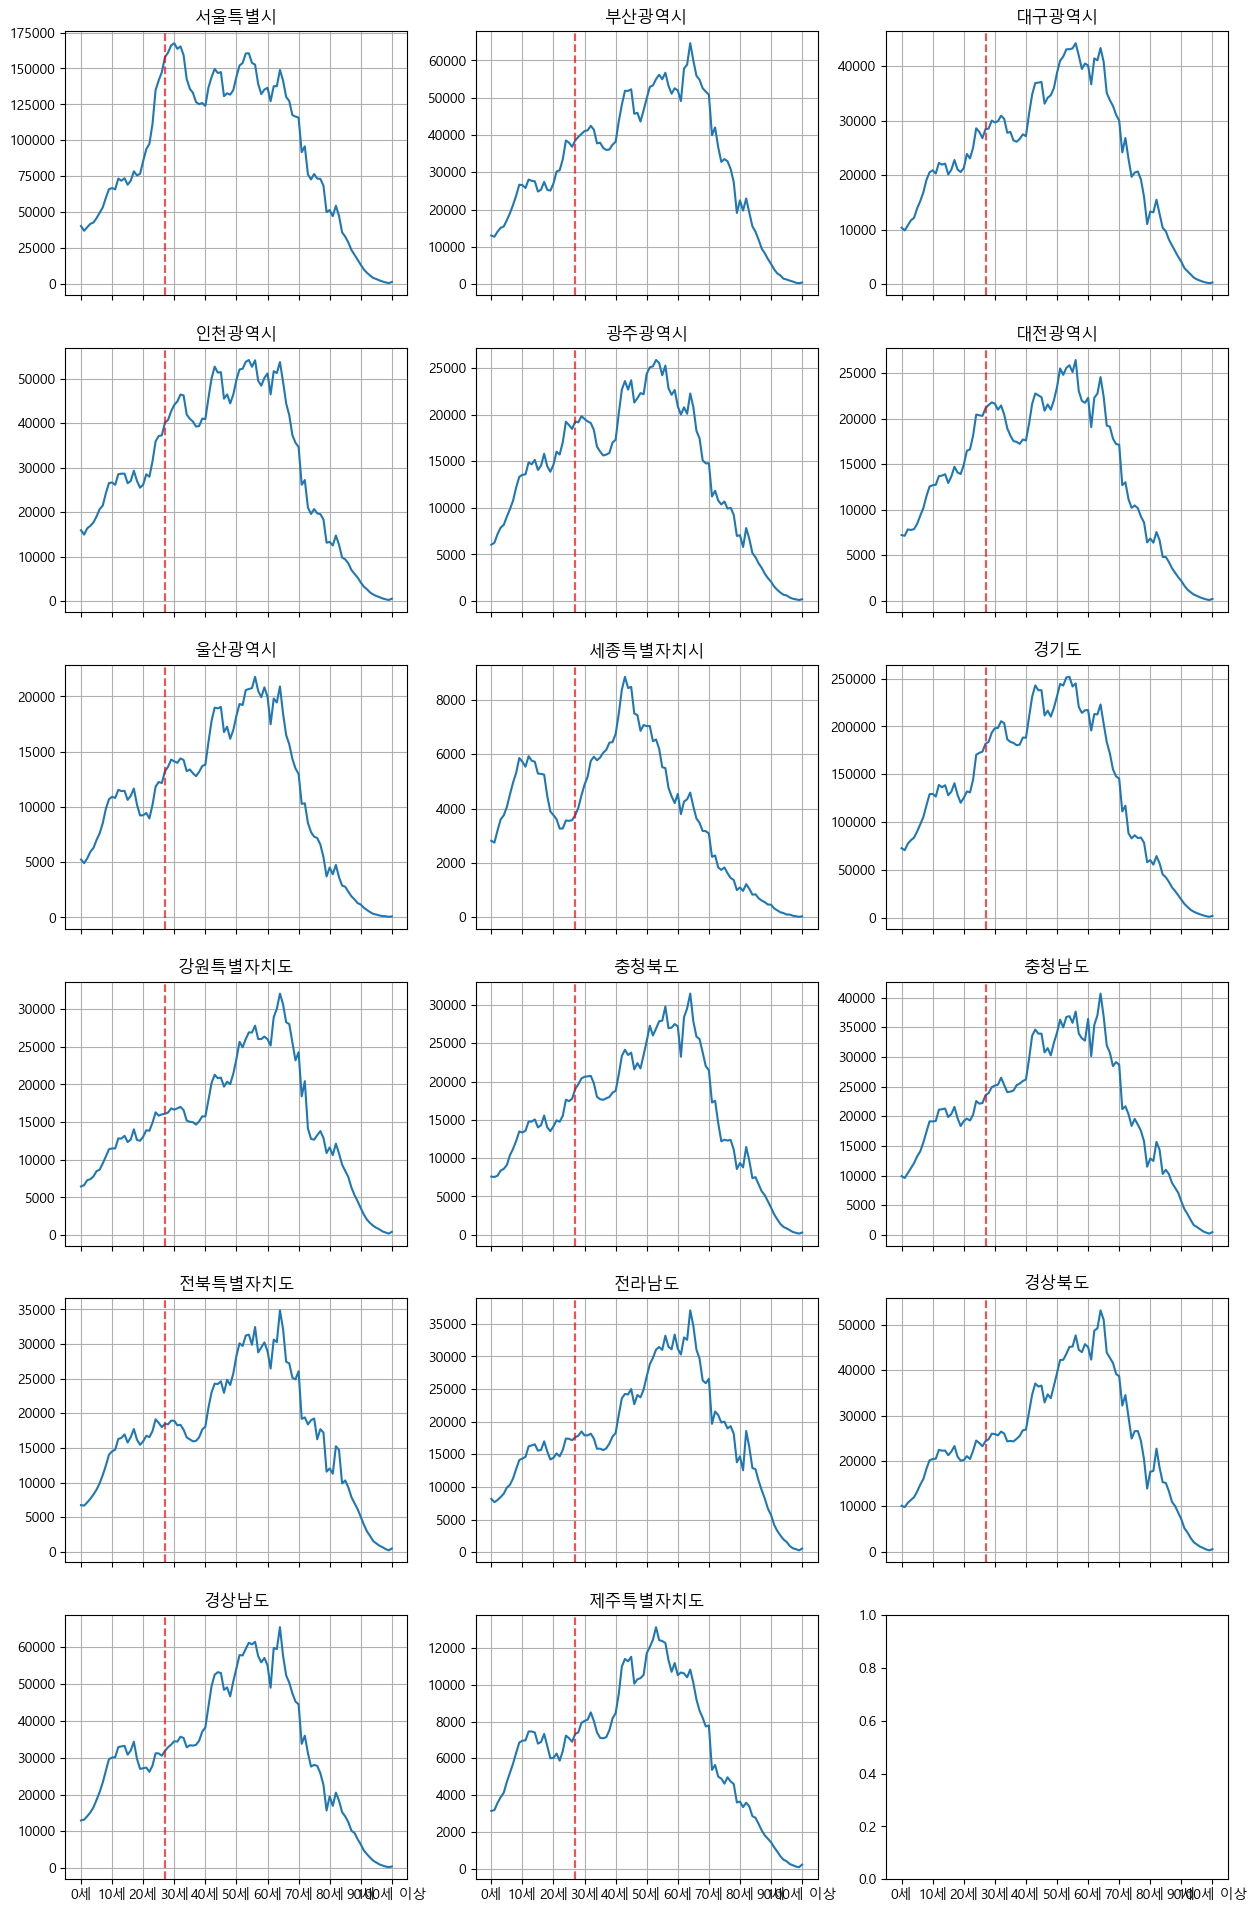

In [12]:
# ---------------------
# 서브플롯
# ---------------------

fig, axes = plt.subplots(6,3, 
                         figsize=(15,24), 
                         sharex=True)

axes_flat = axes.flatten()
for i, region in enumerate(df_region1_T):
    axes_flat[i].plot(df_region1_T[region])
    axes_flat[i].set_title(region)
    axes_flat[i].axvline(x=27, color='r', linestyle='--', alpha=0.7)
    axes_flat[i].grid(True)
   
plt.xticks(range(0, 101, 10));

## 시군구-연령별 인구구조

#### 데이터 준비

In [13]:
df_all1

,행정구역,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,...,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명
0,서울특별시 (1100000000),9335734,9335734,40432,37092,39575,41936,42838,45904,49637,...,7861,5973,4303,3532,2592,1807,1185,635,1506,서울특별시
1,서울특별시 종로구 (1111000000),138184,138184,425,395,440,467,476,524,521,...,180,131,98,59,73,34,37,14,43,서울특별시
2,서울특별시 종로구 청운효자동(1111051500),10986,10986,40,44,43,41,51,45,47,...,15,11,10,3,7,1,3,1,4,서울특별시
3,서울특별시 종로구 사직동(1111053000),8937,8937,30,21,34,37,28,39,40,...,13,12,7,8,11,3,2,1,7,서울특별시
4,서울특별시 종로구 삼청동(1111054000),2189,2189,7,7,5,7,6,6,5,...,6,4,4,3,0,1,1,0,0,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,제주특별자치도 서귀포시 서홍동(5013058000),11088,11088,61,68,76,98,84,107,109,...,9,10,2,5,5,3,0,1,1,제주특별자치도
3906,제주특별자치도 서귀포시 대륜동(5013059000),15038,15038,80,88,103,129,105,141,127,...,23,8,11,5,5,4,1,1,6,제주특별자치도
3907,제주특별자치도 서귀포시 대천동(5013060000),13672,13672,87,93,106,105,124,120,135,...,16,9,8,7,2,3,2,1,1,제주특별자치도
3908,제주특별자치도 서귀포시 중문동(5013061000),12122,12122,61,57,64,82,74,87,100,...,16,10,17,5,7,3,3,2,2,제주특별자치도


In [15]:
# ----------------------------------
# 분석할 행정구역 입력받기
#   - 변수명 : region_select
# ----------------------------------

region_select = input('분석할 행정구역명 : ')
cond = df_all['행정구역명'].str.contains(region_select)
region_select = df_all.loc[cond, '행정구역명'].drop_duplicates()
print(region_select)
region_select = region_select.iloc[0]
print(region_select)
print('분석할 행정구역명 : ', region_select)

3167    경상북도
Name: 행정구역명, dtype: object
경상북도
분석할 행정구역명 :  경상북도


In [16]:
# ----------------------
# 입력받은 행정구역의 시군구 데이터 선택
#   - 변수명 : df_region2
#   - 선택조건1. 행정구역명
#   - 선택조건2. 시군구 행정구역코드는 '000000'(6자리) 로 끝남
#   - 선택조건3. 시군구 행정구역코드는 '000000'(8자리) 로 끝나지 않음
# ----------------------

cond1 = df_all1['행정구역명'] == region_select
cond2 = df_all1['행정구역'].str[-7:-1] == '000000'
cond3 = df_all1['행정구역'].str[-9:-1] != '00000000'
df_region2 = df_all1[cond1&cond2&cond3].copy()
df_region2

,행정구역,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,...,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명
3168,경상북도 포항시 (4711000000),490448,490448,2231,2151,2220,2390,2590,2809,3239,...,478,362,228,179,123,88,57,34,58,경상북도
3201,경상북도 경주시 (4713000000),244408,244408,912,939,958,1033,1082,1119,1313,...,412,301,188,152,105,69,35,20,57,경상북도
3225,경상북도 김천시 (4715000000),135218,135218,626,569,638,687,666,749,861,...,256,184,154,109,77,62,28,19,33,경상북도
3248,경상북도 안동시 (4717000000),152893,152893,553,568,628,657,643,780,847,...,303,214,155,117,105,54,50,24,38,경상북도
3273,경상북도 구미시 (4719000000),403722,403722,1979,1876,2139,2396,2634,2873,3278,...,269,196,139,97,74,57,38,20,41,경상북도
3299,경상북도 영주시 (4721000000),98465,98465,317,289,342,360,346,406,469,...,210,169,120,96,59,36,27,11,32,경상북도
3319,경상북도 영천시 (4723000000),97256,97256,413,401,435,411,445,422,415,...,234,143,101,69,52,27,10,10,14,경상북도
3336,경상북도 상주시 (4725000000),91399,91399,260,295,323,309,319,382,373,...,291,197,126,109,82,66,43,18,50,경상북도
3365,경상북도 문경시 (4728000000),66675,66675,213,201,196,236,275,302,287,...,176,114,80,77,45,41,25,16,29,경상북도
3382,경상북도 경산시 (4729000000),266250,266250,1200,1055,1292,1252,1309,1456,1592,...,269,211,121,96,62,54,28,12,35,경상북도


In [17]:
# ----------------------
# 시군구명 칼럼 생성
# ----------------------
df_region2['시군구명'] = df_region2['행정구역'].str.split(' ').str[1]
df_region2

,행정구역,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,...,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명,시군구명
3168,경상북도 포항시 (4711000000),490448,490448,2231,2151,2220,2390,2590,2809,3239,...,362,228,179,123,88,57,34,58,경상북도,포항시
3201,경상북도 경주시 (4713000000),244408,244408,912,939,958,1033,1082,1119,1313,...,301,188,152,105,69,35,20,57,경상북도,경주시
3225,경상북도 김천시 (4715000000),135218,135218,626,569,638,687,666,749,861,...,184,154,109,77,62,28,19,33,경상북도,김천시
3248,경상북도 안동시 (4717000000),152893,152893,553,568,628,657,643,780,847,...,214,155,117,105,54,50,24,38,경상북도,안동시
3273,경상북도 구미시 (4719000000),403722,403722,1979,1876,2139,2396,2634,2873,3278,...,196,139,97,74,57,38,20,41,경상북도,구미시
3299,경상북도 영주시 (4721000000),98465,98465,317,289,342,360,346,406,469,...,169,120,96,59,36,27,11,32,경상북도,영주시
3319,경상북도 영천시 (4723000000),97256,97256,413,401,435,411,445,422,415,...,143,101,69,52,27,10,10,14,경상북도,영천시
3336,경상북도 상주시 (4725000000),91399,91399,260,295,323,309,319,382,373,...,197,126,109,82,66,43,18,50,경상북도,상주시
3365,경상북도 문경시 (4728000000),66675,66675,213,201,196,236,275,302,287,...,114,80,77,45,41,25,16,29,경상북도,문경시
3382,경상북도 경산시 (4729000000),266250,266250,1200,1055,1292,1252,1309,1456,1592,...,211,121,96,62,54,28,12,35,경상북도,경산시


In [18]:
# ------------------------
# 시군구명 컬럼을 인덱스로 지정
# ------------------------
df_region2 = df_region2.set_index('시군구명')
df_region2

,행정구역,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,...,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명
시군구명,,,,,,,,,,,,,,,,,,,,,
포항시,경상북도 포항시 (4711000000),490448,490448,2231,2151,2220,2390,2590,2809,3239,...,478,362,228,179,123,88,57,34,58,경상북도
경주시,경상북도 경주시 (4713000000),244408,244408,912,939,958,1033,1082,1119,1313,...,412,301,188,152,105,69,35,20,57,경상북도
김천시,경상북도 김천시 (4715000000),135218,135218,626,569,638,687,666,749,861,...,256,184,154,109,77,62,28,19,33,경상북도
안동시,경상북도 안동시 (4717000000),152893,152893,553,568,628,657,643,780,847,...,303,214,155,117,105,54,50,24,38,경상북도
구미시,경상북도 구미시 (4719000000),403722,403722,1979,1876,2139,2396,2634,2873,3278,...,269,196,139,97,74,57,38,20,41,경상북도
영주시,경상북도 영주시 (4721000000),98465,98465,317,289,342,360,346,406,469,...,210,169,120,96,59,36,27,11,32,경상북도
영천시,경상북도 영천시 (4723000000),97256,97256,413,401,435,411,445,422,415,...,234,143,101,69,52,27,10,10,14,경상북도
상주시,경상북도 상주시 (4725000000),91399,91399,260,295,323,309,319,382,373,...,291,197,126,109,82,66,43,18,50,경상북도
문경시,경상북도 문경시 (4728000000),66675,66675,213,201,196,236,275,302,287,...,176,114,80,77,45,41,25,16,29,경상북도


In [19]:
# ------------------------
# ['행정구역', '행정구역명'] 칼럼 삭제
# ------------------------
df_region2.drop(['행정구역', '행정구역명','연령구간인구수'], axis = 1, inplace = True)
df_region2

,총인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
시군구명,,,,,,,,,,,,,,,,,,,,,
포항시,490448,2231,2151,2220,2390,2590,2809,3239,3505,4026,...,553,478,362,228,179,123,88,57,34,58
경주시,244408,912,939,958,1033,1082,1119,1313,1389,1621,...,540,412,301,188,152,105,69,35,20,57
김천시,135218,626,569,638,687,666,749,861,888,996,...,332,256,184,154,109,77,62,28,19,33
안동시,152893,553,568,628,657,643,780,847,847,1026,...,372,303,214,155,117,105,54,50,24,38
구미시,403722,1979,1876,2139,2396,2634,2873,3278,3602,4068,...,307,269,196,139,97,74,57,38,20,41
영주시,98465,317,289,342,360,346,406,469,565,624,...,264,210,169,120,96,59,36,27,11,32
영천시,97256,413,401,435,411,445,422,415,459,490,...,247,234,143,101,69,52,27,10,10,14
상주시,91399,260,295,323,309,319,382,373,430,508,...,359,291,197,126,109,82,66,43,18,50
문경시,66675,213,201,196,236,275,302,287,325,358,...,238,176,114,80,77,45,41,25,16,29


In [20]:
# ------------------------
# 행렬 전치
#   df_region2_t
# ------------------------
df_region2 = df_region2.sort_values(['총인구수'], ascending = False)
df_region2_t = df_region2.T
df_region2_t

시군구명,포항시,구미시,경산시,경주시,안동시,김천시,칠곡군,영주시,영천시,상주시,...,의성군,울진군,성주군,청도군,영덕군,고령군,봉화군,청송군,영양군,울릉군
총인구수,490448,403722,266250,244408,152893,135218,106521,98465,97256,91399,...,48456,46045,41214,40437,32999,29977,28588,23600,15261,9040
0세,2231,1979,1200,912,553,626,270,317,413,260,...,115,182,133,93,75,73,46,63,25,30
1세,2151,1876,1055,939,568,569,310,289,401,295,...,161,187,136,97,72,83,53,65,26,28
2세,2220,2139,1292,958,628,638,349,342,435,323,...,135,194,148,118,82,76,72,71,35,23
3세,2390,2396,1252,1033,657,687,405,360,411,309,...,126,176,147,90,96,101,65,80,31,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96세,123,74,62,105,105,77,38,59,52,82,...,44,38,35,36,35,18,23,22,17,7
97세,88,57,54,69,54,62,26,36,27,66,...,37,35,21,25,20,16,23,19,9,3
98세,57,38,28,35,50,28,18,27,10,43,...,22,15,15,16,13,8,9,11,6,2
99세,34,20,12,20,24,19,9,11,10,18,...,10,13,7,13,8,5,15,9,9,2


In [21]:
df_region2_t.drop(index = '총인구수', inplace = True)
df_region2_t

시군구명,포항시,구미시,경산시,경주시,안동시,김천시,칠곡군,영주시,영천시,상주시,...,의성군,울진군,성주군,청도군,영덕군,고령군,봉화군,청송군,영양군,울릉군
0세,2231,1979,1200,912,553,626,270,317,413,260,...,115,182,133,93,75,73,46,63,25,30
1세,2151,1876,1055,939,568,569,310,289,401,295,...,161,187,136,97,72,83,53,65,26,28
2세,2220,2139,1292,958,628,638,349,342,435,323,...,135,194,148,118,82,76,72,71,35,23
3세,2390,2396,1252,1033,657,687,405,360,411,309,...,126,176,147,90,96,101,65,80,31,25
4세,2590,2634,1309,1082,643,666,426,346,445,319,...,134,204,125,90,92,82,82,64,40,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96세,123,74,62,105,105,77,38,59,52,82,...,44,38,35,36,35,18,23,22,17,7
97세,88,57,54,69,54,62,26,36,27,66,...,37,35,21,25,20,16,23,19,9,3
98세,57,38,28,35,50,28,18,27,10,43,...,22,15,15,16,13,8,9,11,6,2
99세,34,20,12,20,24,19,9,11,10,18,...,10,13,7,13,8,5,15,9,9,2


#### 시각화

In [22]:
# ----------------
# 시군구 갯수(서브플롯 갯수)
#   axes_cnt
# ----------------
axes_cnt = df_region2_t.shape[1]
# ----------------
# 서브플롯 행의 갯수
#   row_cnt
# ----------------
row_cnt = axes_cnt // 3 + 1 if axes_cnt % 3 else axes_cnt // 3
# ----------------
# 서브플롯 세로 크기
#   fig_height
# ----------------
fig_height = row_cnt * 4


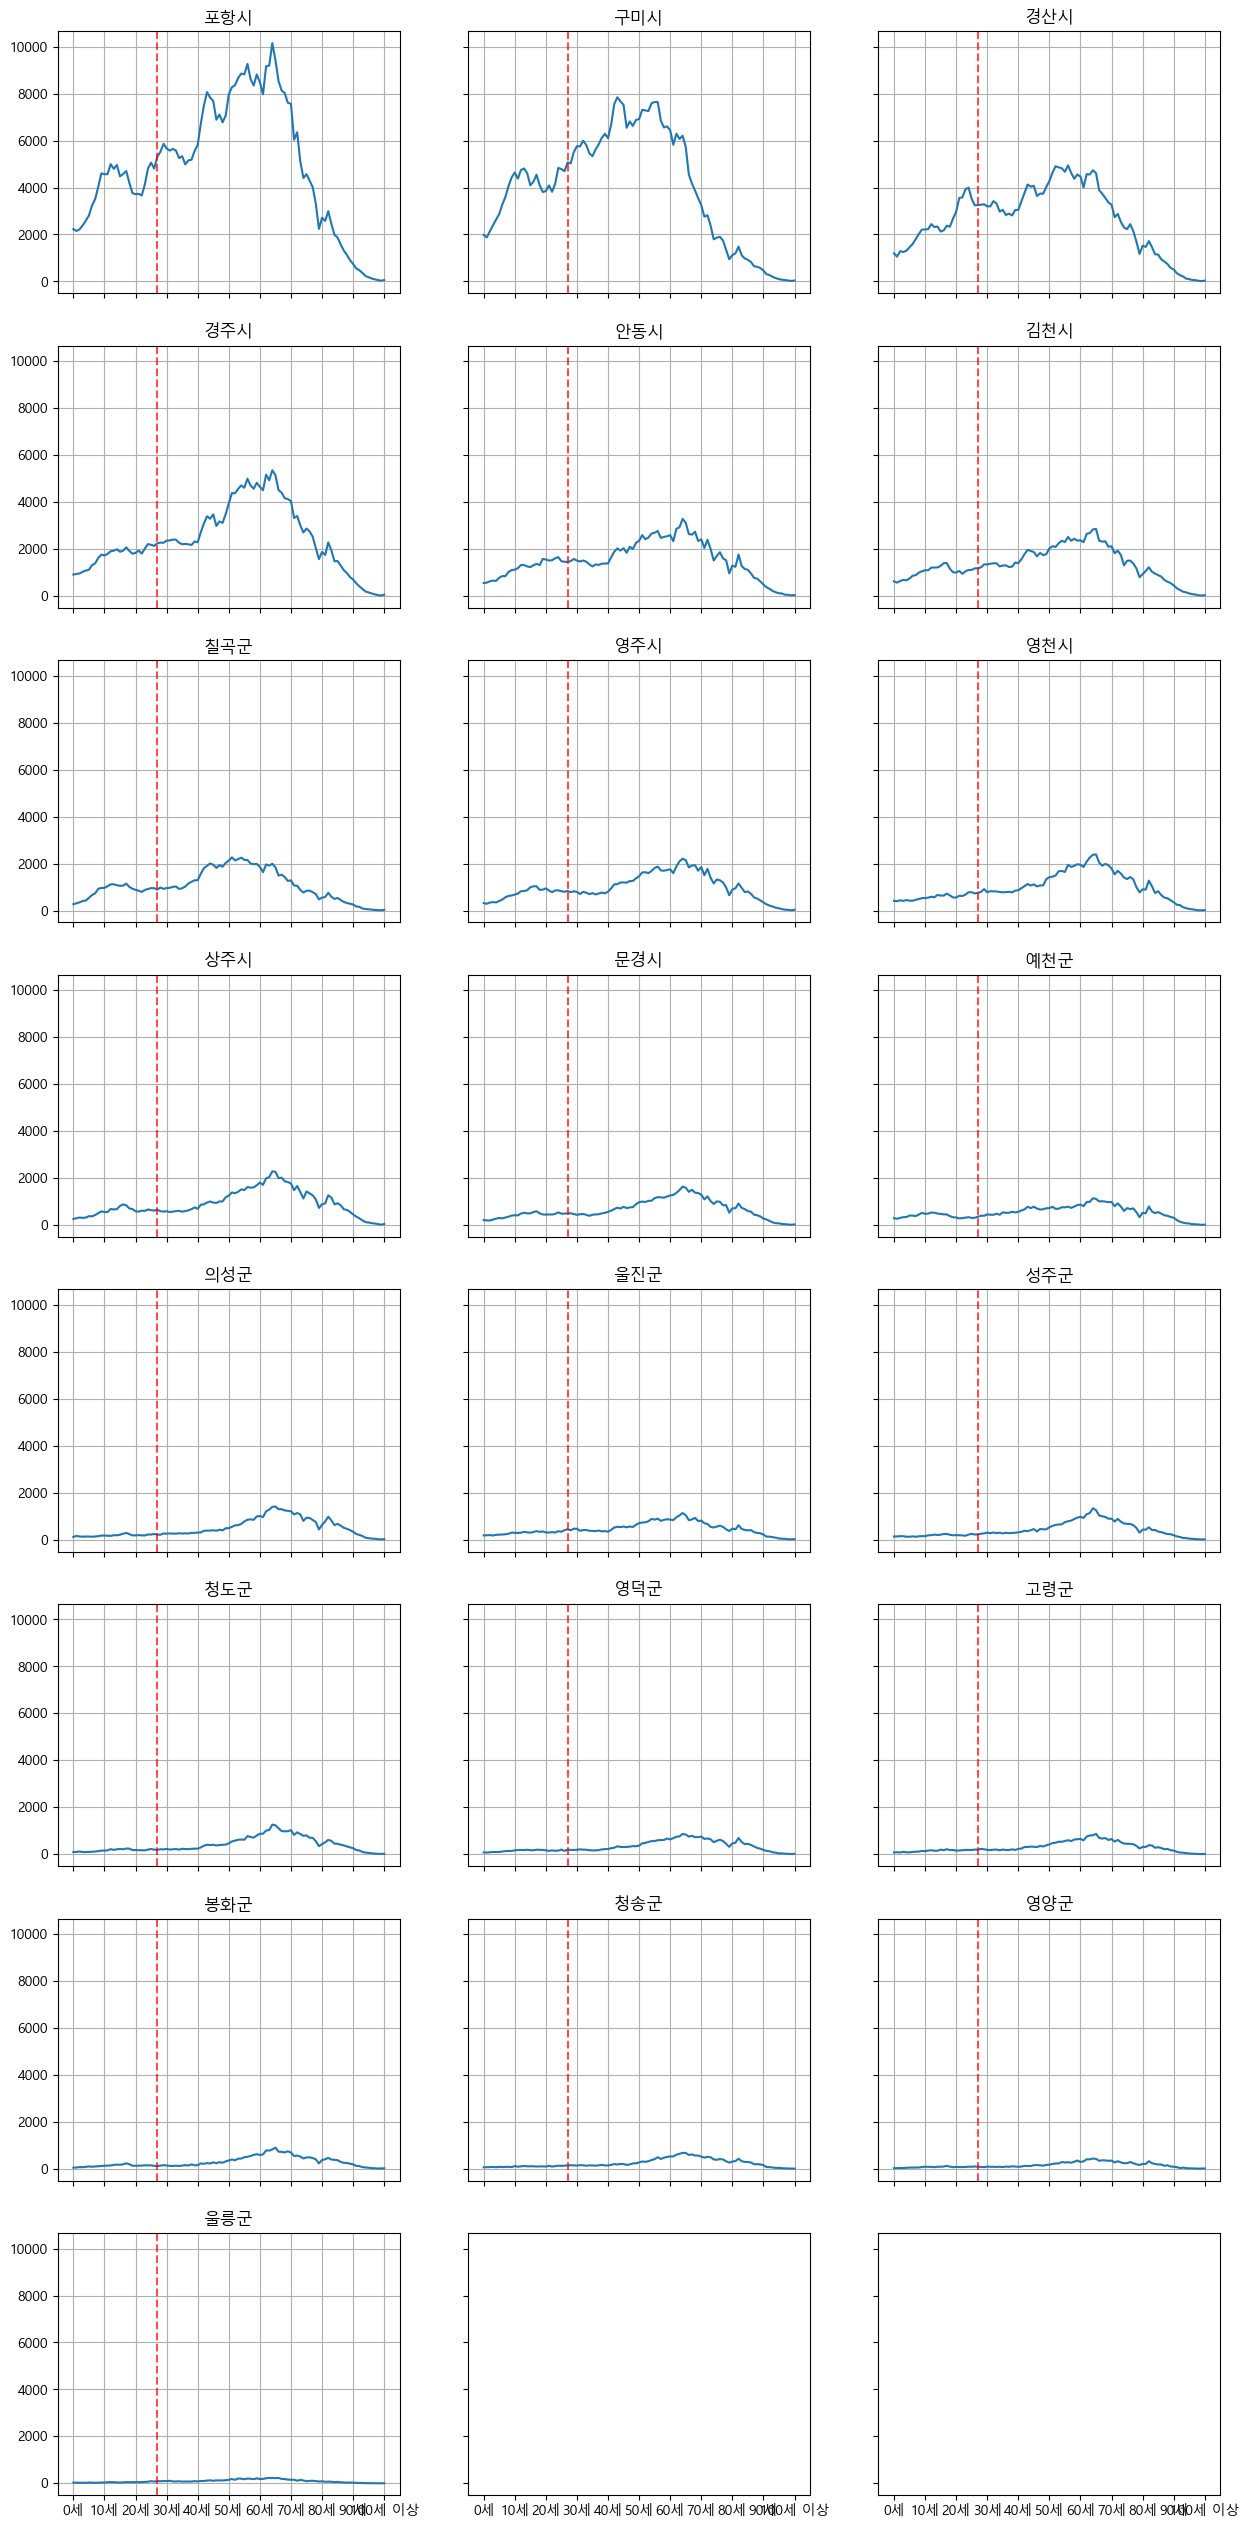

In [23]:
# ---------------------
# 서브플롯
# ---------------------

fig, axes = plt.subplots(row_cnt,3, 
                         figsize=(15,fig_height), 
                         sharex=True,
                         sharey=True)

axes_flat = axes.flatten()
for i, region in enumerate(df_region2_t):
    axes_flat[i].plot(df_region2_t[region])
    axes_flat[i].set_title(region)
    axes_flat[i].axvline(x=27, color='r', linestyle='--', alpha=0.7)
    axes_flat[i].grid(True)
   
plt.xticks(range(0, 101, 10));

## 📊 연령별 인구 분포 시각화 및 분석

행정구역명을 기준으로 연령별 인구 분포를 시각화하고, **내 또래 인구가 많은 지역**을 확인하기 위해 `axvline`을 활용하여 내 나이를 기준선으로 표시하였다.  
분석 결과, **서울특별시**는 내 또래 인구가 매우 많은 것으로 나타났으며, 전반적으로 **청년층과 중년층 비율**이 높은 경향을 보였다.  
반면, 대부분의 다른 행정구역에서는 **중장년층의 비율이 월등히 높았고**, **세종특별자치시**의 경우에는 특이하게 **청소년 비율**이 상대적으로 높았다.
이러한 결과를 통해, 그래프 상에서 **고령화 현상이 뚜렷하게 드러남**을 확인할 수 있었으며, 또래 인구가 많은 환경을 선호하는 나로서는 **서울 거주 의지가 더욱 확고해졌다**.

---

## 🗺️ 경상북도 시·군·구 인구 분석

다음으로, 내 고향인 **포항시**가 속한 경상북도의 시·군·구별 인구를 분석하였다.  
분석 결과, **포항시가 경상북도 내에서 압도적으로 많은 인구를 보유**하고 있었으며,  
그 뒤를 **구미시 → 경산시 → 경주시** 순으로 인구 규모가 형성되었다.  
지역별 인구 편차가 상당히 커서, **도시별 인구 집중 현상이 뚜렷하게 나타남**을 확인할 수 있었다.

---

## 💡 인사이트
- **서울특별시**: 청년층·중년층 비율이 높아 젊은 인구 밀집 지역임.
- **세종특별자치시**: 타 지역 대비 청소년 비율이 두드러짐 → 교육 인프라 집중 가능성.
- **대부분의 지역**: 중장년층 비율이 높아 고령화 진행 속도가 빠름.
- **경상북도**: 포항시 인구 집중 현상 뚜렷 → 경제·산업 중심지 역할.
